In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/vp054179/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [104]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import tokenize
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv('Datasets/Elon_musk.csv')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [17]:
data['Text'][1]

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [12]:
del data['Unnamed: 0']

In [13]:
data.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


### Text Preprocessing

In [79]:
tweets=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [83]:
tweets[1]

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [86]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens = []
for i in range(0,len(tweets)):
    tweet_tokens=tknzr.tokenize(tweets[i])
    tweets_tokens.append(tweet_tokens)
#print(tweets_tokens)

In [87]:
tweets_tokens[0]

['I', '�', 'm', 'an', 'alien']

In [89]:
# Again Joining the list into one string/text
tweets_tokens_text = []
for i in range(0,len(tweets_tokens)):
    txt = ' '.join(tweets_tokens[i])
    tweets_tokens_text.append(txt)
    


In [95]:
tweets_tokens_text[2],tweets_tokens_text[5]

('Great interview !', 'Happy New Year of the Ox ! https://t.co/9WFKMYu2oj')

In [96]:
# Remove Punctuations 
import string
no_punc_text = []
for i in range(0,len(tweets_tokens_text)):
    txt = tweets_tokens_text[i].translate(str.maketrans('','',string.punctuation))
    no_punc_text.append(txt)


In [97]:
no_punc_text[2],no_punc_text[5]

('Great interview ', 'Happy New Year of the Ox  httpstco9WFKMYu2oj')

In [101]:
# remove https or url within text
no_url_text = []

for i in range(0,len(no_punc_text)):
    txt = re.sub(r'http\S+', '', no_punc_text[i])
    no_url_text.append(txt)
    
no_url_text[2],no_url_text[5],no_url_text[0]

('Great interview ', 'Happy New Year of the Ox  ', 'I � m an alien')

In [107]:
from nltk.tokenize import word_tokenize

text_tokens = []
for i in range(0,len(no_url_text)):
    txt = word_tokenize(no_url_text[i])
    text_tokens.append(txt)

text_tokens[2],text_tokens[5],text_tokens[0]

(['Great', 'interview'],
 ['Happy', 'New', 'Year', 'of', 'the', 'Ox'],
 ['I', '�', 'm', 'an', 'alien'])

In [106]:
no_url_text[0]

'I � m an alien'

In [108]:

# Remove Stopwords

my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','�','U0001F3B6','U0001F495']
my_stop_words.extend(sw_list)
no_stop_tokens = []

for i in range(0,len(text_tokens)):
    txt = [word for word in text_tokens[i] if not word in my_stop_words]
    no_stop_tokens.append(txt)
    
no_stop_tokens[2],no_stop_tokens[5],no_stop_tokens[0]

(['Great', 'interview'], ['Happy', 'New', 'Year', 'Ox'], ['alien'])

In [116]:
# Normalize the data
lower_words = []
for i in range(0,len(no_stop_tokens)):
    txt = [Text.lower() for Text in no_stop_tokens[i]]
    lower_words.append(txt)
    
lower_words[2],lower_words[5],lower_words[0],lower_words[1]


(['great', 'interview'],
 ['happy', 'new', 'year', 'ox'],
 ['alien'],
 ['ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried'])

In [115]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')

lemmas = []
for i in range(0,len(lower_words)):
    doc=nlp(' '.join(lower_words[i]))
    lm = [token.lemma_ for token in doc]
    lemmas.append(lm)
    

lemmas[2],lemmas[5],lemmas[0],lemmas[1]

(['great', 'interview'],
 ['happy', 'new', 'year', 'ox'],
 ['alien'],
 ['ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try'])

In [117]:
clean_tweets = []
for i in range(0,len(lemmas)):
    txt = ' '.join(lemmas[i])
    clean_tweets.append(txt)
clean_tweets[2],clean_tweets[5],clean_tweets[0],clean_tweets[1]    

('great interview',
 'happy new year ox',
 'alien',
 'ray trace cyberpunk hdr nextlevel have try')

In [119]:
data ['tweets'] = clean_tweets
data.head()

,Text,tweets
0,@kunalb11 I�m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr nextlevel have try
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...


### Emotion Mining - Sentiment Analysis

In [52]:
affin = pd.read_csv('Datasets/affin.csv')
print(affin.shape)
affin.head()

(2477, 2)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [54]:
affinity_scores=affin.set_index('word')['value'].to_dict()


In [56]:
# Custom function: score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

In [57]:
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [131]:
# manual testing
calculate_sentiment(text='awesome day')

4

In [61]:
calculate_sentiment(text='bad')

-3

In [120]:
# Calculating sentiment value for each sentence
data['sentiment_value']=data['tweets'].apply(calculate_sentiment)
data['sentiment_value']

0       0
1       0
2       3
3      -1
4       6
       ..
1994   -1
1995    1
1996    0
1997   -3
1998    2
Name: sentiment_value, Length: 1999, dtype: int64

In [121]:
data.sort_values(by='sentiment_value')

,Text,tweets,sentiment_value
186,"@naval [Some tyranny]. Also, the road to hell ...",some tyranny also road hell mostly pave bad in...,-7
1273,@TJLK There are some eerie parallels between T...,there eerie parallel the boring company vaultt...,-6
1015,@enn_nafnlaus There are sketchy edits to Tesla...,there sketchy edit tesla wiki whitewash eberha...,-6
1717,@Neuro_Skeptic They don�t fire all at once. So...,they fire some go several second minute withou...,-6
1574,@universal_sci Asteroid impact risk is well un...,asteroid impact risk well understand comet tho...,-5
...,...,...,...
1172,Thanks Tesla Team for great work on deliveries...,thank tesla team great work delivery for new o...,10
468,@picot_john @CyberpunkGame It�s a good to grea...,it good great game imo improve may seem like m...,10
1357,Great trip to Germany. Support from government...,great trip germany support government people s...,10
1304,"One way or another, excitement guaranteed! Sup...",one way another excitement guarantee support g...,11


In [122]:
# Sentiment score of the whole review
data['sentiment_value'].describe()

count    1999.000000
mean        0.703352
std         1.800774
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [123]:
# negative sentiment score of the whole review
data[data['sentiment_value']<=0]

,Text,tweets,sentiment_value
0,@kunalb11 I�m an alien,alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr nextlevel have try,0
3,@gtera27 Doge is underestimated,doge underestimate,-1
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdoge all thought would fail himself,-2
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweet definitely represent realworld ti...,0
...,...,...,...
1992,AI symbiosis while u wait,ai symbiosis u wait,0
1993,@vistacruiser7 @flcnhvy There�s some of that too,there,0
1994,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still e...,-1
1996,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0


In [124]:
# positive sentiment score of the whole review
data[data['sentiment_value']>0]

,Text,tweets,sentiment_value
2,@joerogan @Spotify Great interview!,great interview,3
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,6
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox,3
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thank,5
9,The most entertaining outcome is the most likely,the entertaining outcome likely,2
...,...,...,...
1986,Best use of the term �Full Stack�?,good use term full stack,3
1987,@PPathole @IheartTesla For sure. This is both ...,for sure this great terrify everything ever se...,3
1989,"@buzzindelhi Sorry, should hopefully be soon!",sorry hopefully soon,1
1995,@PPathole Make sure to read ur terms &amp; con...,make sure read ur term condition click accept,1


In [126]:
# how many words are there in a sentence?
data['word_count']=data['tweets'].str.split().apply(len)
data['word_count']

0        1
1        7
2        2
3        2
4       10
        ..
1994     9
1995     8
1996     2
1997     5
1998     4
Name: word_count, Length: 1999, dtype: int64

In [128]:
# Adding index cloumn
data['index']=range(0,len(data))
data.head()

,Text,tweets,sentiment_value,word_count,index
0,@kunalb11 I�m an alien,alien,0,1,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr nextlevel have try,0,7,1
2,@joerogan @Spotify Great interview!,great interview,3,2,2
3,@gtera27 Doge is underestimated,doge underestimate,-1,2,3
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,6,10,4


/Users/vp054179/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


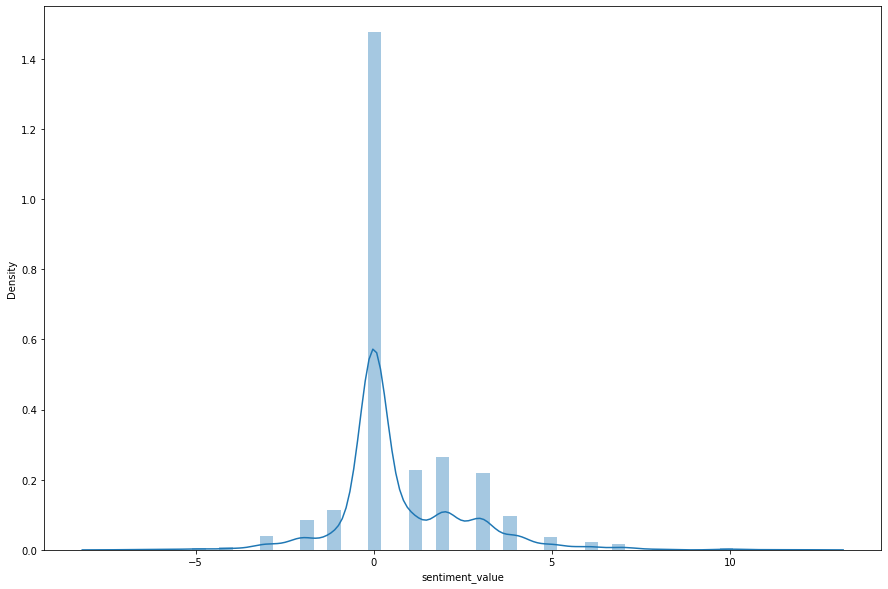

In [129]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(data['sentiment_value'])
plt.show()

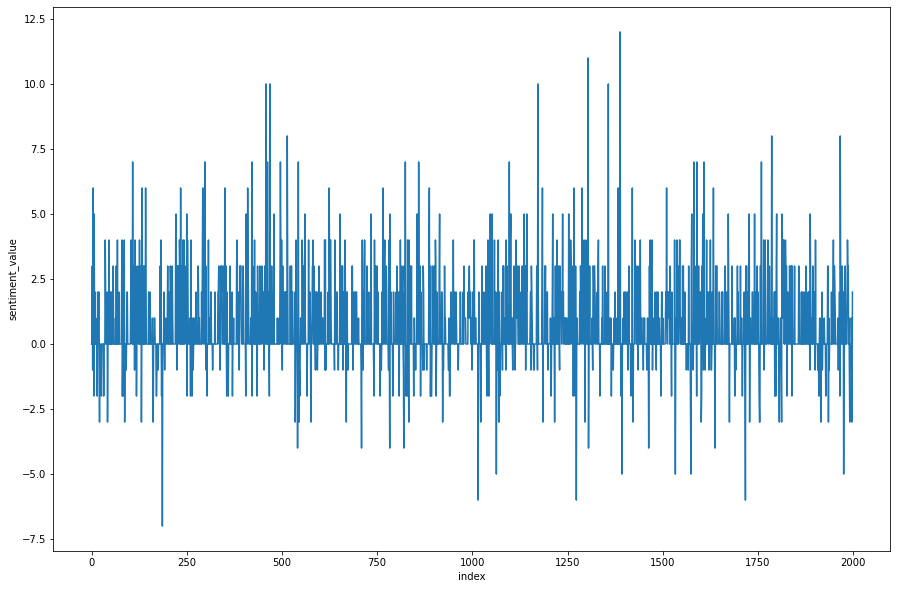

In [132]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=data)
plt.show()

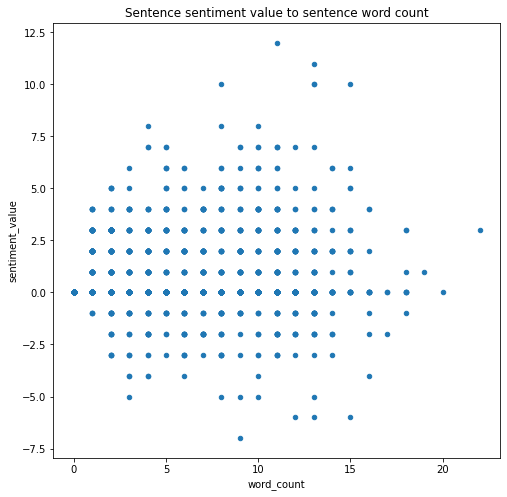

In [133]:
# Correlation analysis
data.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
plt.show()